In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('AAME.csv')
df = df.dropna()

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [4]:
X_feature = df[['Open', 'High', 'Low', 'Close']]
X_feature = X_feature[X_feature['Open'] != 0]

X_feature

,Open,High,Low,Close
66,3.80,3.80,3.80,3.80
71,3.50,3.50,3.50,3.50
72,3.50,3.50,3.50,3.50
118,4.60,4.60,4.60,4.60
194,5.25,5.25,5.25,5.25
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_feature)

In [6]:
def make_multivariate_io(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])        # shape: (window, 4)
        y.append(data[i+window][-1])      # Close 값만 예측 (index -1 또는 3)
    return np.array(X), np.array(y)


window_size = 7
X, y = make_multivariate_io(X_scaled, window_size)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6815, 7, 4), (1704, 7, 4), (6815,), (1704,))

In [8]:
# LSTM 모델 구성
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size, 4)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.summary()

c:\Users\syjwk\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0063 - val_loss: 1.2472e-04
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9622e-04 - val_loss: 1.0308e-04
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1275e-04 - val_loss: 1.0244e-04
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9046e-04 - val_loss: 8.4552e-05
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8290e-04 - val_loss: 9.1038e-05
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4888e-04 - val_loss: 7.0527e-05
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5465e-04 - val_loss: 2.8033e-04
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8970e-04 - val_loss: 6.4602e-05
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3156e-04 - val_loss: 6.4170e-05
Epoch 10/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3500e-04 - val_loss: 6.3522e-05
Epoch 11/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.

In [10]:
# 예측
y_pred = model.predict(X_test)

# MSE 계산 및 출력
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (Normalized): {mse:.6f}")

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE (Normalized): 0.000084


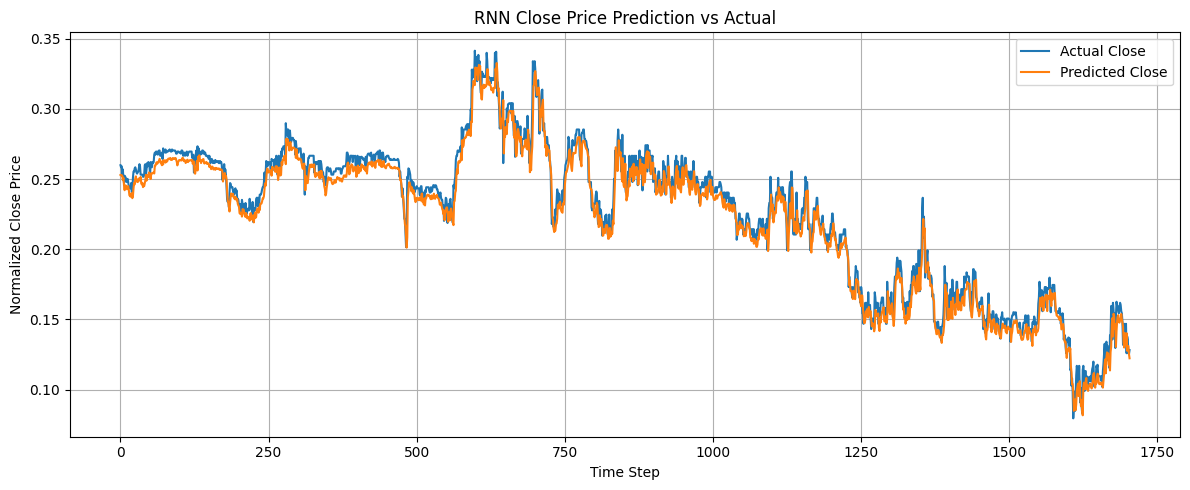

In [11]:
# 시각화
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual Close')
plt.plot(y_pred, label='Predicted Close')
plt.title('RNN Close Price Prediction vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()